# Práctica 2: Aprendizaje automático

__Fecha de entrega: 16 de mayo de 2021__

El objetivo de esta práctica es aplicar los distintos algoritmos de aprendizaje automático disponibles en la scikit-learn [sklearn](https://scikit-learn.org/stable/) sobre varios conjuntos de datos y aprender a interpretar los resultados obtenidos. La práctica consta de 3 notebooks que se entregarán simultáneamente en la tarea de entrega habilitada en el Campus  Virtual.

Lo más importante en esta práctica no es el código Python, sino el análisis de los datos y modelos que construyas y las explicaciones razonadas de cada una de las decisiones que tomes. __No se valorarán trozos de código o gráficas sin ningún tipo de contexto o explicación__.

Finalmente, recuerda establecer el parámetro `random_state` en todas las funciones que tomen decisiones aleatorias para que los resultados sean reproducibles (los resultados no varíen entre ejecuciones).

# Apartado 1: Clustering

__Número de grupo: 01__

__Nombres de los estudiantes: María Arranz y Celia Rubio__

## 1) Carga del conjunto de datos

Crea un dataframe a partir del fichero `countries_of_the_world.csv` que se proporciona junto con la práctica. Usa como índice el nombre de los países. 

Vamos a eliminar la columna `Region` por ser categórica y todas las filas en las que faltan valores usando la operación `dropna`.

Muestra el dataframe resultante y explica cuántos países y variables contiene.

In [42]:
import pandas as pd
filename = './countries_of_the_world.csv'
df = pd.read_csv(filename)
df = df.drop(['Region'],axis=1)
df = df.dropna(axis=0)
df

,Country,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
0,Afghanistan,31056997,647500,48.0,0.00,23.06,163.07,700.0,36.0,3.2,12.13,0.22,87.65,1.0,46.60,20.34,0.380,0.240,0.380
1,Albania,3581655,28748,124.6,1.26,-4.93,21.52,4500.0,86.5,71.2,21.09,4.42,74.49,3.0,15.11,5.22,0.232,0.188,0.579
2,Algeria,32930091,2381740,13.8,0.04,-0.39,31.00,6000.0,70.0,78.1,3.22,0.25,96.53,1.0,17.14,4.61,0.101,0.600,0.298
6,Anguilla,13477,102,132.1,59.80,10.76,21.03,8600.0,95.0,460.0,0.00,0.00,100.00,2.0,14.17,5.34,0.040,0.180,0.780
7,Antigua & Barbuda,69108,443,156.0,34.54,-6.15,19.46,11000.0,89.0,549.9,18.18,4.55,77.27,2.0,16.93,5.37,0.038,0.220,0.743
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
218,Venezuela,25730435,912050,28.2,0.31,-0.04,22.20,4800.0,93.4,140.1,2.95,0.92,96.13,2.0,18.71,4.92,0.040,0.419,0.541
219,Vietnam,84402966,329560,256.1,1.05,-0.45,25.95,2500.0,90.3,187.7,19.97,5.95,74.08,2.0,16.86,6.22,0.209,0.410,0.381
224,Yemen,21456188,527970,40.6,0.36,0.00,61.50,800.0,50.2,37.2,2.78,0.24,96.98,1.0,42.89,8.30,0.135,0.472,0.393
225,Zambia,11502010,752614,15.3,0.00,0.00,88.29,800.0,80.6,8.2,7.08,0.03,92.90,2.0,41.00,19.93,0.220,0.290,0.489


Contiene 179 paises y 19 variables (número de filas y de columnas).

## 2) Análisis de los datos

En este notebook vamos a trabajar con un subconjunto de las variables. Crea un nuevo dataframe que sólo contenga las variables `GDP ($ per capita)`, `Literacy (%)`, `Phones (per 1000)`, `Agriculture`, `Industry` y `Service`. ¿Qué crees que representan cada una de esas variables?

Analiza razonadamente las distribuciones de cada una de las variables (medias, desviaciones típicas, rangos, ...) y las principales relaciones entre pares de variables (diagrama de dispersión, coeficientes de correlación, ...).

In [43]:
variables = ['GDP ($ per capita)','Literacy (%)','Phones (per 1000)','Agriculture','Industry','Service']
df2 = df.loc[:,variables]
df2.describe()

,GDP ($ per capita),Literacy (%),Phones (per 1000),Agriculture,Industry,Service
count,179.000000,179.000000,179.000000,179.000000,179.000000,179.000000
mean,9125.698324,81.944134,208.151955,0.156905,0.288028,0.554508
std,9644.123141,19.837537,210.121875,0.151343,0.140310,0.165670
min,500.000000,17.600000,0.200000,0.000000,0.032000,0.062000
25%,1800.000000,69.950000,27.100000,0.039000,0.197000,0.424500
50%,5100.000000,90.900000,137.100000,0.101000,0.274000,0.559000
75%,12950.000000,97.800000,335.000000,0.233000,0.349000,0.668500
max,37800.000000,100.000000,898.000000,0.769000,0.906000,0.954000


¿Qué crees que representan cada una de esas variables? Analiza razonadamente las distribuciones de cada una de las variables (medias, desviaciones típicas, rangos, ...)

In [78]:
df2.corr()

,GDP ($ per capita),Literacy (%),Phones (per 1000),Agriculture,Industry,Service
GDP ($ per capita),1.000000,0.522880,0.883520,-0.616919,0.032855,0.536551
Literacy (%),0.522880,1.000000,0.592042,-0.620514,0.105703,0.474395
Phones (per 1000),0.883520,0.592042,1.000000,-0.631578,-0.084247,0.649638
Agriculture,-0.616919,-0.620514,-0.631578,1.000000,-0.352785,-0.613489
Industry,0.032855,0.105703,-0.084247,-0.352785,1.000000,-0.521413
Service,0.536551,0.474395,0.649638,-0.613489,-0.521413,1.000000


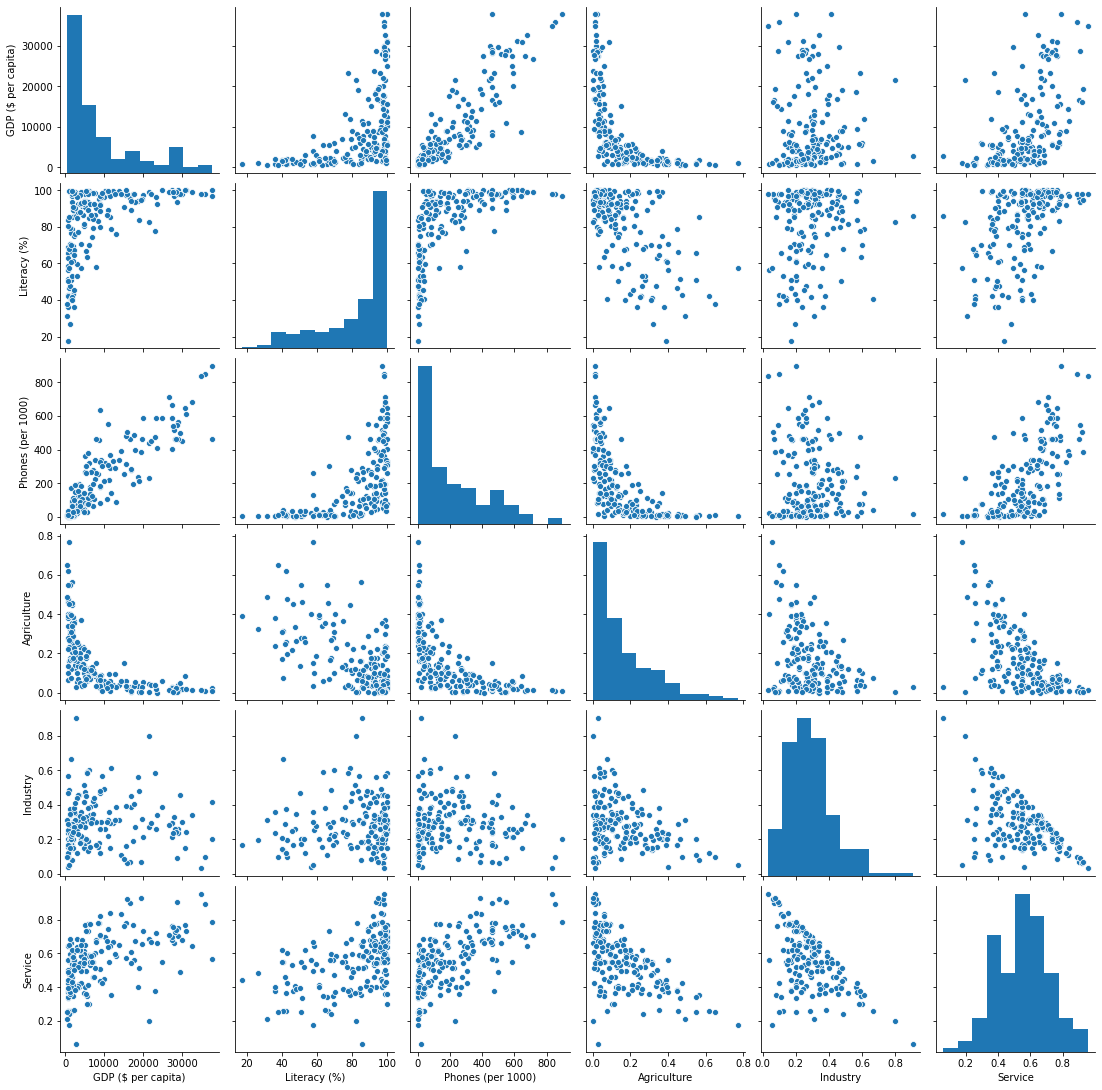

In [77]:
import seaborn as sns

sns.pairplot(df2)


 y las principales relaciones entre pares de variables (diagrama de dispersión, coeficientes de correlación, ...).

## 3) Preprocesar los datos

Teniendo en cuenta que vamos a utilizar el algoritmo k-Means para encontrar grupos de países similares, explica razonadamente si es necesario o no cambiar la escalas de los datos y si a priori es mejor reescalarlos (MinMaxScaler) o estandarizarlos (StandarScaler).

Si decides preprocesarlos, accede al array interno del dataframe y crea un nuevo array con los datos escalados.

explica razonadamente si es necesario o no cambiar la escalas de los datos y si a priori es mejor reescalarlos (MinMaxScaler) o estandarizarlos (StandarScaler).

In [44]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(df2)
X = scaler.transform(df2)
pd.DataFrame(X,columns=variables).describe()

,GDP ($ per capita),Literacy (%),Phones (per 1000),Agriculture,Industry,Service
count,179.000000,179.000000,179.000000,179.000000,179.000000,179.000000
mean,0.231252,0.780875,0.231624,0.204038,0.292938,0.552139
std,0.258556,0.240747,0.234041,0.196805,0.160537,0.185728
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.034853,0.635316,0.029962,0.050715,0.188787,0.406390
50%,0.123324,0.889563,0.152484,0.131339,0.276888,0.557175
75%,0.333780,0.973301,0.372912,0.302991,0.362700,0.679933
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## 4) Encontrar el número óptimo de clusters

Decide razonadamente el número óptimo de clusters en el rango 2..10. Ten en cuenta que para interpretar los datos no nos interesa tampoco tener un número excesivo de clusters. Para hacerlo calcula y pinta el diagrama del codo, el índice davies_boulding y el coeficiente silhouette en función del número de clusters.

In [45]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

def plot_clusters(X, labels=None, centers=None):
    """ Función auxiliar para pintar los puntos de los clusters y, optativamente, sus centros.
    :param X: array de puntos de dos dimensiones (array de array de enteros)
    :param labels: cluster al que pertenece cada punto (array de enteros)
    :param centers: coordenadas de los centroides de los clusters (array de array de enteros)
    """
    
    colors = ['r','g','b','c','y','k','m',]
    fig = plt.figure(figsize=(8,8))
    
    # Los dos primeros parámetros de la función scatter son las coordenadas de los puntos,
    # el parámetro 'c' indica la clase asignada de cada punto, y 'cmap' se usa para colorear 
    # las distintas clases
    plt.scatter(X[:,0], X[:,1], c=labels, cmap=ListedColormap(colors))
    
    # Pintar los centroides de los clusters
    if centers is not None:
        plt.scatter(centers[:,0], centers[:,1], marker="x", color='k', s=150, linewidths = 5, zorder=10)
        
    plt.show()

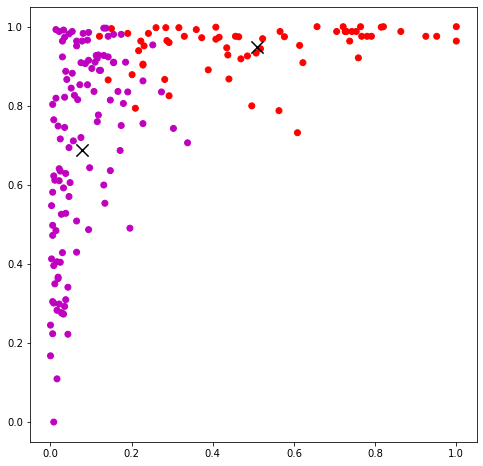

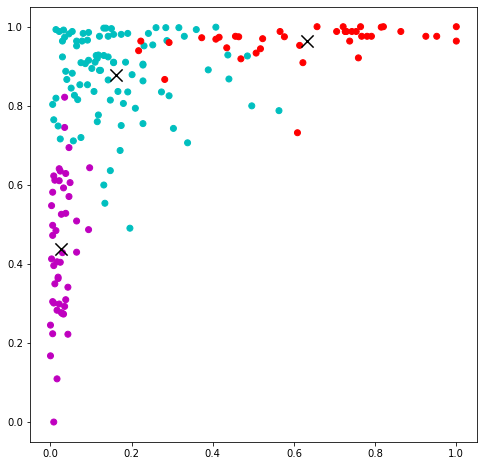

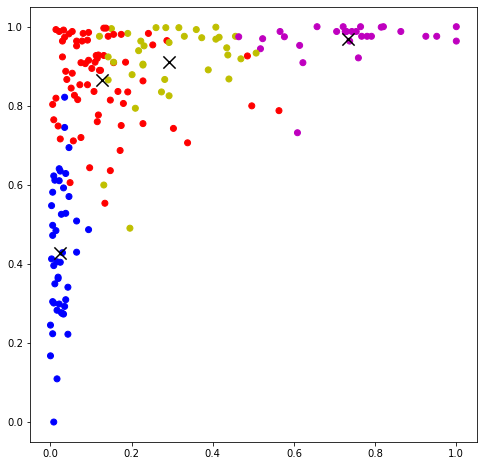

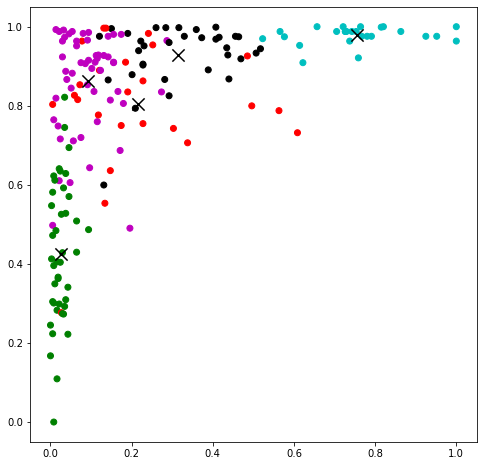

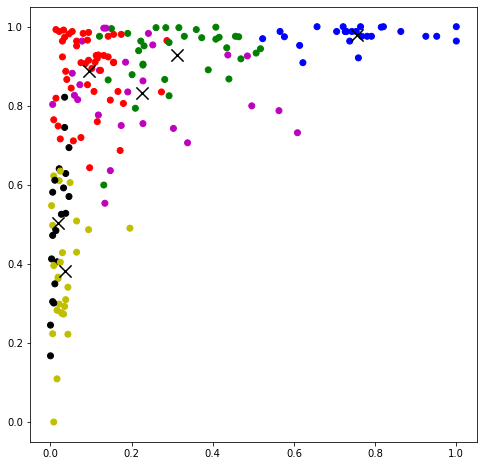

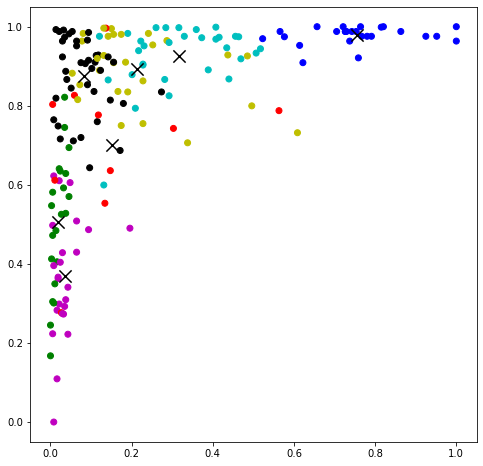

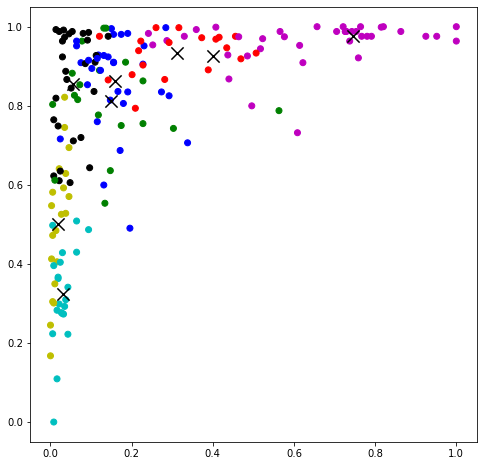

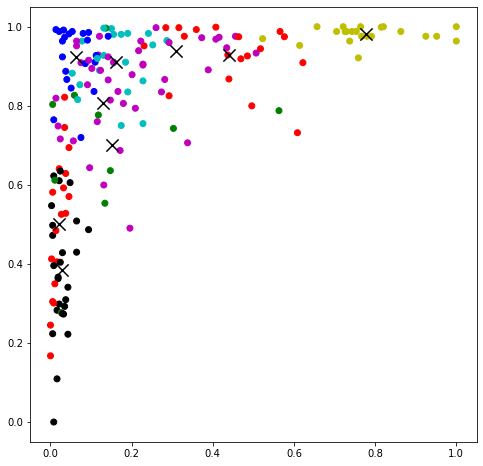

In [46]:
from sklearn.metrics import davies_bouldin_score, silhouette_score
import numpy as np
from sklearn.cluster import KMeans
RANDOM_STATE=333
K_MAX = 10
score = np.zeros(K_MAX-2)
davies_boulding = np.zeros(K_MAX-2)
silhouette = np.zeros(K_MAX-2)
for k in range(2, K_MAX): 
    km = KMeans(init='random', n_clusters=k, random_state=RANDOM_STATE)
    km.fit(X)
    plot_clusters(X, km.labels_, km.cluster_centers_)
    
    score[k-2] = -1 * km.score(X)
    davies_boulding[k-2] = davies_bouldin_score(X, km.labels_)
    silhouette[k-2] = silhouette_score(X, km.labels_)

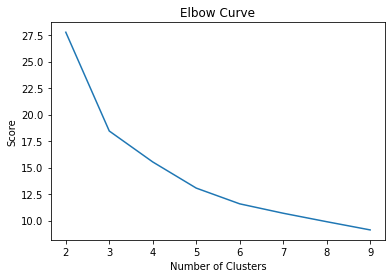

In [47]:
# diagrama del codo
plt.plot(range(2, K_MAX), score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

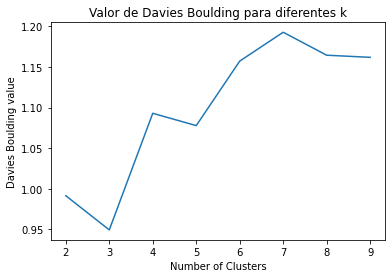

In [48]:
# davies boulding
plt.plot(range(2, K_MAX), davies_boulding)
plt.xlabel('Number of Clusters')
plt.ylabel('Davies Boulding value')
plt.title('Valor de Davies Boulding para diferentes k')
plt.show()

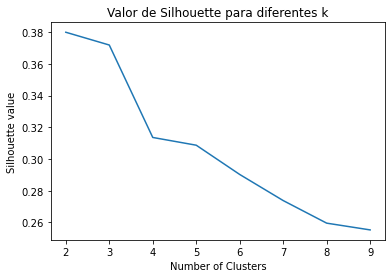

In [49]:
# silhouette
plt.plot(range(2, K_MAX), silhouette)
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette value')
plt.title('Valor de Silhouette para diferentes k')
plt.show()

Decide razonadamente el número óptimo de clusters en el rango 2..10.

## 5) Descripción de los clusters

Describe los clusters que has obtenido en el apartado anterior y trata identificar el grupo de países que contienen. Si te han salido más de 3 elige 3 de ellos que sean bastante diferentes entre sí. 

Para hacerlo estudia sus descriptores estadísticos y pinta el diagrama de dispersión en función de cada par de variables usando colores diferentes para cada cluster. ¿Qué clusters se separan mejor y en función de qué variables? ¿y cuáles se confunden más?

__Cuidado__: para poder interpretar correctamente los datos necesitas que estén en su escala original. Si decidiste escalar los datos, deberás ejecutar kMeans con los datos escalados pero asignar las etiquetas de clusters al conjunto de datos inicial. En este caso es muy sencillo porque el algoritmo no cambia el orden de los datos así que puedes crear directamente una nueva columna en el dataframe original con esas etiquetas. Puede que aparezca un SettingWithCopyWarning por asignar una nueva columna en un dataframe que es una vista de otro dataframe. Puedes ignorar este aviso o puedes hacer una copia del dataframe con `copy` para que no comparta memoria con el otro.

In [63]:
km = KMeans(init='random', n_clusters=3, random_state=RANDOM_STATE)
km.fit(X)

centers = km.cluster_centers_
centers

array([[0.6325067 , 0.96256068, 0.59030129, 0.03569571, 0.24439359,
        0.74515135],
       [0.16149901, 0.87767782, 0.1843625 , 0.15511393, 0.34652025,
        0.54128485],
       [0.02629628, 0.4367641 , 0.0188783 , 0.44307335, 0.22936852,
        0.40912127]])

In [64]:
import pandas as pd

# crear data frame con los puntos originales
df = pd.DataFrame(data=df2, columns = variables)
# añadir una columna con el cluster al que pertenece cada punto
df = df.assign(cluster=km.labels_)
df


,GDP ($ per capita),Literacy (%),Phones (per 1000),Agriculture,Industry,Service,cluster
0,700.0,36.0,3.2,0.380,0.240,0.380,2
1,4500.0,86.5,71.2,0.232,0.188,0.579,1
2,6000.0,70.0,78.1,0.101,0.600,0.298,1
6,8600.0,95.0,460.0,0.040,0.180,0.780,0
7,11000.0,89.0,549.9,0.038,0.220,0.743,0
...,...,...,...,...,...,...,...
218,4800.0,93.4,140.1,0.040,0.419,0.541,1
219,2500.0,90.3,187.7,0.209,0.410,0.381,1
224,800.0,50.2,37.2,0.135,0.472,0.393,2
225,800.0,80.6,8.2,0.220,0.290,0.489,1


In [65]:
# mostramos la matriz transpuesta para que la info salga en vertical
df.groupby(["cluster"]).describe().transpose()

cluster                              0             1            2
GDP ($ per capita) count     40.000000     92.000000    47.000000
                   mean   24092.500000   6523.913043  1480.851064
                   std     7732.893030   4524.690981   816.311508
                   min     8600.000000    700.000000   500.000000
                   25%    17950.000000   3275.000000   800.000000
                   50%    25900.000000   5450.000000  1300.000000
                   75%    29025.000000   9000.000000  1850.000000
                   max    37800.000000  21500.000000  4100.000000
Literacy (%)       count     40.000000     92.000000    47.000000
                   mean      96.915000     89.920652    53.589362
                   std        3.872821      8.884504    14.501683
                   min       77.900000     58.000000    17.600000
                   25%       96.550000     85.025000    42.300000
                   50%       97.950000     92.250000    52.900000
                   75%       99.000000     97.350000    65.950000
                   max      100.000000     99.900000    85.300000
Phones (per 1000)  count     40.000000     92.000000    47.000000
                   mean     530.172500    165.720652    17.148936
                   std      138.167347    107.955035    23.621378
                   min      194.500000      3.700000     0.200000
                   25%      458.375000     75.075000     3.600000
                   50%      493.300000    141.500000     9.700000
                   75%      590.025000    260.525000    19.550000
                   max      898.000000    463.800000   131.800000
Agriculture        count     40.000000     92.000000    47.000000
                   mean       0.027450      0.119283     0.340723
                   std        0.019916      0.084219     0.149452
                   min        0.000000      0.002000     0.073000
                   25%        0.010750      0.058000     0.243500
                   50%        0.021500      0.099500     0.322000
                   75%        0.040000      0.164000     0.424500
                   max        0.086000      0.370000     0.769000
Industry           count     40.000000     92.000000    47.000000
                   mean       0.245600      0.334859     0.232468
                   std        0.115622      0.145356     0.118078
                   min        0.032000      0.088000     0.040000
                   25%        0.175000      0.229750     0.167500
                   50%        0.252000      0.311000     0.204000
                   75%        0.298000      0.412250     0.281500
                   max        0.585000      0.906000     0.666000
Service            count     40.000000     92.000000    47.000000
                   mean       0.726675      0.544826     0.426936
                   std        0.119561      0.134877     0.124527
                   min        0.375000      0.062000     0.177000
                   25%        0.671000      0.445000     0.351500
                   50%        0.729000      0.551500     0.406000
                   75%        0.780000      0.640750     0.542000
                   max        0.954000      0.818000     0.643000

In [79]:
df.corr()

,GDP ($ per capita),Literacy (%),Phones (per 1000),Agriculture,Industry,Service,cluster
GDP ($ per capita),1.000000,0.522880,0.883520,-0.616919,0.032855,0.536551,-0.799481
Literacy (%),0.522880,1.000000,0.592042,-0.620514,0.105703,0.474395,-0.783653
Phones (per 1000),0.883520,0.592042,1.000000,-0.631578,-0.084247,0.649638,-0.837246
Agriculture,-0.616919,-0.620514,-0.631578,1.000000,-0.352785,-0.613489,0.734831
Industry,0.032855,0.105703,-0.084247,-0.352785,1.000000,-0.521413,-0.052440
Service,0.536551,0.474395,0.649638,-0.613489,-0.521413,1.000000,-0.625855
cluster,-0.799481,-0.783653,-0.837246,0.734831,-0.052440,-0.625855,1.000000


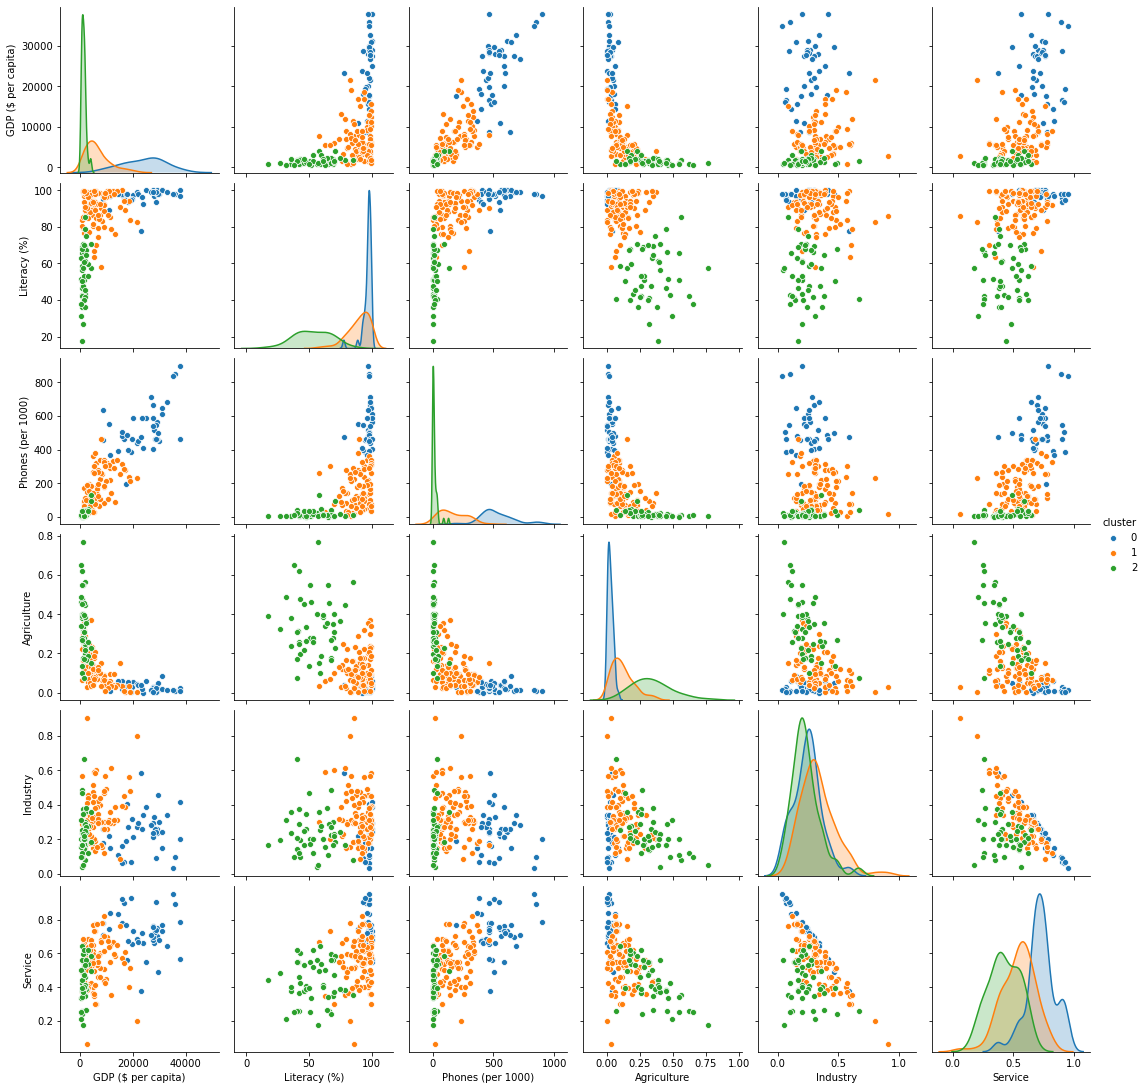

In [74]:
import seaborn as sns

sns.pairplot(df, hue = 'cluster')



Describe los clusters que has obtenido en el apartado anterior y trata identificar el grupo de países que contienen. Si te han salido más de 3 elige 3 de ellos que sean bastante diferentes entre sí. 

Para hacerlo estudia sus descriptores estadísticos y pinta el diagrama de dispersión en función de cada par de variables usando colores diferentes para cada cluster. ¿Qué clusters se separan mejor y en función de qué variables? ¿y cuáles se confunden más?
